In [210]:
import numpy as np
import scipy as sp
import scipy.linalg as solve
from numpy import linalg as la
def gauss(A, b, x,  tol = 10**(-6), sc = 10**(-6)):
    #FORM: A x = b ----> A: matrix, x: vector, b: vector
    #A, b, x - matrices used to generate soln, x is first guess of soln
    #tol = absolute tolerance for convergence (default is set to 10^-6)
    #sc = stopping criterion (relative error)
    #to use only tol or sc option for convergence condition, set the other option to -1.
    LD = np.tril(A)
    U = A - LD
    i = 1
    temp = x
    x = np.dot(np.linalg.inv(LD), b - np.dot(U, x))
    err = abs(temp - x)
    maxerr = max(err) 
    maxrelerr = max(err / x)
    while (maxerr > tol and maxrelerr > sc):
        i += 1
        temp = x
        x = np.dot(np.linalg.inv(LD), b - np.dot(U, x))
        err = abs(temp - x)
        maxerr = max(err)
        maxrelerr = max(err / x)
    return (x,i) #Return solution and number of iterations

In [211]:
# a lower, b middle, c upper, d rhs
# reference : https://gist.github.com/ofan666/1875903
def thomas(a, b, c, d):
    n = len(b)
    x = np.ones(n)
    for i in range (1, n):
        m = a[i - 1] / b[i - 1]
        b[i] = b[i] - m * c[i - 1]
        d[i] = d[i] - m * d[i - 1]
    x[n - 1] = d[n - 1] / b[n - 1]
    k = n - 2
    while k >= 0:
        x[k] = (d[k] - c[k] * x[k + 1]) / b[k]
        k = k - 1
    return x 


In [212]:
def fdsolver(h):
    D = 1
    sigma = 0.2
    S = 8
    L2 = D / sigma
    sol = thomas(np.ones(8 / h - 2) * -1,np.ones(8 / h - 1) * (2 + h**2.0 / L2), np.ones(8 / h - 2) * -1, np.ones(8 / h -1) * h**2 * S / D)
    sol = np.append([0], sol)
    sol = np.append(sol, [0])
    return sol

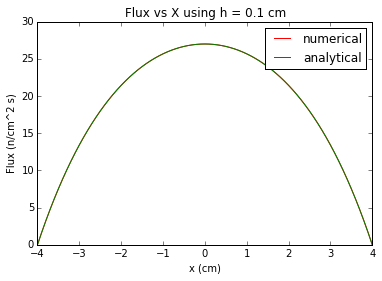

In [214]:
#Problem 2 using Finite diff method and THOMAS ALGS
h = 0.1
f = fdsolver(h)
x = np.linspace(-4, 4, 8 / h + 1)
fref = 40 * (1 - np.cosh(np.sqrt(0.2) * x)/np.cosh(np.sqrt(0.2) * 4))
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, f, 'r')
plt.plot(x, fref, 'g')
plt.legend(("numerical", "analytical"), loc="upper right")
plt.xlabel("x (cm)")
plt.ylabel("Flux (n/cm^2 s)")
plt.title("Flux vs X using h = 0.1 cm")

In [216]:
#Problem 3. Find the relation between error and total number of meshes h = 1, 0.5, 0.1, 0.05, 0.01
error = np.zeros(5)
# h = 1 
h = 1
f = fdsolver(h)
x = np.linspace(-4, 4, 8 / h + 1)
fref = 40 * (1 - np.cosh(np.sqrt(0.2) * x)/np.cosh(np.sqrt(0.2) * 4))
fref = fref[1 : int(8 / h)]
f = f[1 : int(8 / h)]
relerror = abs(fref - f) / fref
error[0] = max(relerror)
# h = 0.5 

h = 0.5
f = fdsolver(h)
x = np.linspace(-4, 4, 8 / h + 1)
fref = 40 * (1 - np.cosh(np.sqrt(0.2) * x)/np.cosh(np.sqrt(0.2) * 4))
fref = fref[1 : int(8 / h)]
f = f[1 : int(8 / h)]
relerror = abs(fref - f) / fref
error[1] = max(relerror)

# h = 0.1

h = 0.1
f = fdsolver(h)
x = np.linspace(-4, 4, 8 / h + 1)
fref = 40 * (1 - np.cosh(np.sqrt(0.2) * x)/np.cosh(np.sqrt(0.2) * 4))
fref = fref[1 : int(8 / h)]
f = f[1 : int(8 / h)]
relerror = abs(fref - f) / fref
error[2] = max(relerror)

# h = 0.1

h = 0.05
f = fdsolver(h)
x = np.linspace(-4, 4, 8 / h + 1)
fref = 40 * (1 - np.cosh(np.sqrt(0.2) * x)/np.cosh(np.sqrt(0.2) * 4))
fref = fref[1 : int(8 / h)]
f = f[1 : int(8 / h)]
relerror = abs(fref - f) / fref
error[3] = max(relerror)

h = 0.01
f = fdsolver(h)
x = np.linspace(-4, 4, 8 / h + 1)
fref = 40 * (1 - np.cosh(np.sqrt(0.2) * x)/np.cosh(np.sqrt(0.2) * 4))
fref = fref[1 : int(8 / h)]
f = f[1 : int(8 / h)]
relerror = abs(fref - f) / fref
error[4] = max(relerror)
print error

[  8.44660179e-03   2.30286448e-03   9.84273962e-05   2.48043656e-05
   9.98489371e-07]


[   8.   16.   80.  160.  800.]


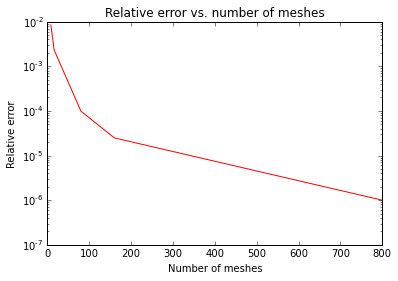

In [217]:
h = np.array([1, 0.5, 0.1, 0.05, 0.01])
mesh = 8 / h
print mesh
plt.plot(mesh, error, 'r')
plt.xlabel("Number of meshes")
plt.ylabel("Relative error")
plt.yscale('log')
plt.title("Relative error vs. number of meshes")

In [218]:
#4. 
n = 79
A = np.zeros(shape=(n,n))
for i in range(0,n):
    if(i == 0):
        A[0][0] = 200.7
        A[0][1] = -100
    elif(i == n-1):
        A[n-1][n-1] = 200.7
        A[n-1][n-2] = -100
    else:
        A[i][i - 1] = -100
        A[i][i] = 200.7
        A[i][i + 1] = -100
        
print A

[[ 200.7 -100.     0.  ...,    0.     0.     0. ]
 [-100.   200.7 -100.  ...,    0.     0.     0. ]
 [   0.  -100.   200.7 ...,    0.     0.     0. ]
 ..., 
 [   0.     0.     0.  ...,  200.7 -100.     0. ]
 [   0.     0.     0.  ..., -100.   200.7 -100. ]
 [   0.     0.     0.  ...,    0.  -100.   200.7]]


K value: 0.701617363566
Number of iteration: 8


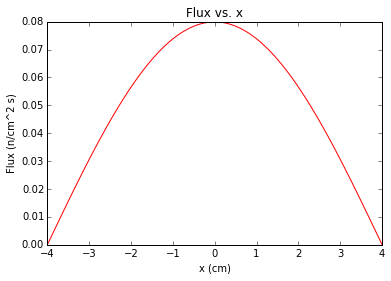

In [228]:
def fdeigenvaluesolver(A, finitial, kinitial, ftol, ktol):
    Q = 1/kinitial*0.6*finitial
    ftemp = finitial
    k = kinitial
    ferr = 1
    kerr = 1
    i = 0
    while ferr > ftol or kerr > ktol:
        fnew, fiter = gauss(A, Q, ftemp)
        Qnew = 1/k*0.6*fnew
        knew = k*np.sum(Qnew)/np.sum(Q)
        #ferr = abs(la.norm(ftemp) - la.norm(fnew))
        ferr = abs(la.norm(ftemp) - la.norm(fnew))
        kerr = abs(k - knew)
        k = knew
        Q = Qnew
        ftemp = fnew
        i += 1
    ftemp = np.append([0],ftemp)
    ftemp = np.append(ftemp, [0])
    print ("K value: " + str(k))
    return ftemp, i
finitial = fdsolver(0.1)
fsol, fi = fdeigenvaluesolver(A, finitial[1 : -1]/la.norm(finitial[1 : -1]) , 1, 0.0001, 0.0001)
print ("Number of iteration: " + str(fi))

x = np.linspace(-4, 4, 81)
plt.plot(x, fsol, 'r')
plt.xlabel("x (cm)")
plt.ylabel("Flux (n/cm^2 s)")
plt.title("Flux vs. x")

